In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

In [259]:
t = np.linspace(0, 10, 990)

In [260]:
ys = np.sin(t*20)#+t-t**2

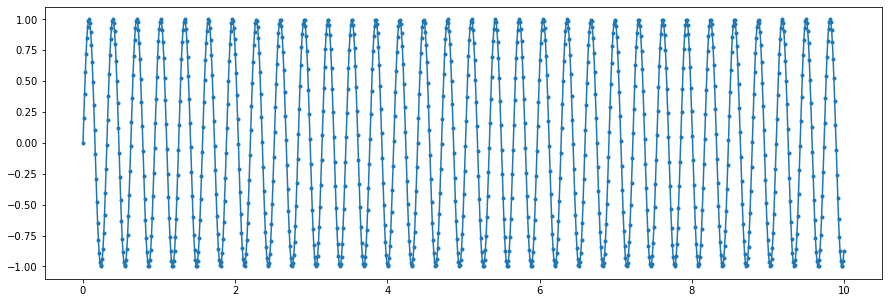

In [261]:
plt.figure(figsize=(15,5))
plt.plot(t, ys, '.-')

In [262]:
import keras 
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dense

In [278]:
y = ys.reshape(-1, 10)
x = y
x = x[:-1, :, np.newaxis]
y = y[1:]
print(x.shape, y.shape)

(98, 10, 1) (98, 10)


In [285]:
model = Sequential()
nt_predict = 10
model.add(LSTM(nt_predict, activation='tanh', input_shape=(x.shape[1], x.shape[2])))
model.compile(optimizer='rmsprop', loss='mse')

In [286]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 10)                480       
Total params: 480
Trainable params: 480
Non-trainable params: 0
_________________________________________________________________


In [287]:
hist = model.fit(x, y, verbose=0, epochs=10000, 
                 callbacks=[keras.callbacks.EarlyStopping(monitor='loss', 
                            min_delta=1e-3, patience=100, verbose=0, mode='auto', 
                            baseline=None, restore_best_weights=True)])

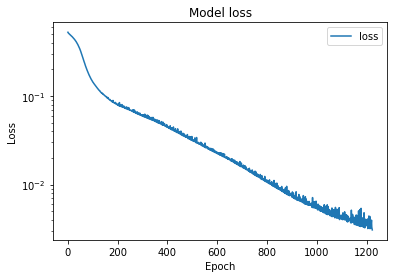

In [288]:
h = hist.model.history

# Plot training & validation loss value
fig, ax = plt.subplots()
ax.plot(h.history['loss'], label='loss')
#ax.plot(h.history['val_loss'], label='val_loss')
plt.title('Model loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.legend() #['Train', 'Test'], loc='upper left')
ax.set_yscale('log')
#fig.savefig(f_hist); plt.close('all')

In [289]:
y2 = model.predict(x)
y2.shape

(98, 10)

(98, 10)


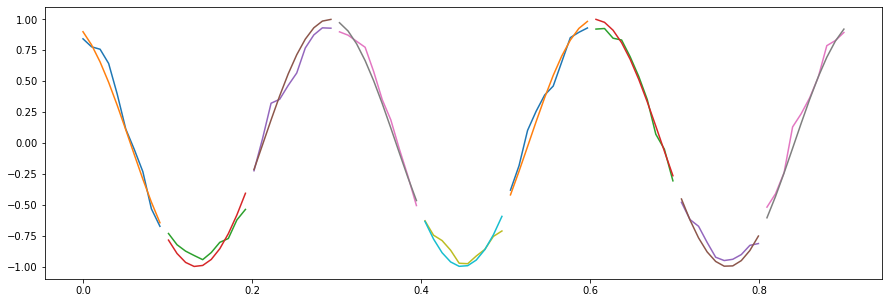

In [290]:
fig, ax = plt.subplots(figsize=(15,5))
print(y2.shape)

dt = 10
nt = y2.shape[0]
for i in range(0, 9):
    #print(i)
    ax.plot(t[i*dt:(i+1)*dt], y2[i,:])
    ax.plot(t[i*dt:(i+1)*dt], y[i,:])
    #ax.plot(t[:100], ys[:100])

(98, 10)


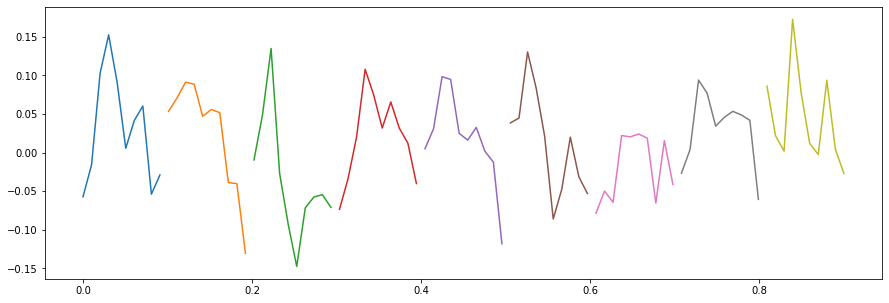

In [291]:
fig, ax = plt.subplots(figsize=(15,5))
print(y2.shape)

nt = y2.shape[0]
for i in range(0, 9):
    dy = y2[i,:] - y[i,:]
    ax.plot(t[i*dt:(i+1)*dt], dy)
    #ax.plot(t[i*dt:(i+1)*dt], y[i,:])
    #ax.plot(t[:100], ys[:100])

In [292]:
dy = y2-y

In [293]:
np.mean(dy**2)**.5

0.0659177240651535